<a href="https://www.kaggle.com/code/suyashkapil/odi-double-hundreds-analysis?scriptVersionId=117286112" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/odi-double-hundreds/ODI Double Hundreds.csv


In [2]:
data = pd.read_csv('/kaggle/input/odi-double-hundreds/ODI Double Hundreds.csv')
data

,Name,Team,Year,Innings,Position,Runs,Balls,Strike Rate,Against,Series,City,Host Nation,Team Score,MOTM,Win,Not Out,Captain
0,Sachin Tendulkar,India,2010,1,Open,200,147,136.054422,South Africa,Bilateral,Gwalior,India,401/3,Yes,Yes,Yes,No
1,Virendra Sehwag,India,2011,1,Open,219,149,146.979866,West Indies,Bilateral,Indore,India,418/5,Yes,Yes,No,No
2,Rohit Sharma,India,2013,1,Open,209,158,132.278481,Australia,Bilateral,Bengaluru,India,383/6,Yes,Yes,No,No
3,Rohit Sharma,India,2014,1,Open,264,173,152.601156,Sri Lanka,Bilateral,Kolkata,India,404/5,Yes,Yes,No,No
4,Chris Gayle,West Indies,2015,1,Open,215,147,146.258503,Zimbabwe,World Cup,Canberra,Australia,372/2,Yes,Yes,No,No
5,Martin Guptill,New Zealand,2015,1,Open,237,163,145.398773,West Indies,World Cup,Wellington,New Zealand,393/6,Yes,Yes,Yes,No
6,Rohit Sharma,India,2017,1,Open,208,153,135.947712,Sri Lanka,Bilateral,Mohali,India,392/4,Yes,Yes,No,No
7,Fakhar Zaman,Pakistan,2018,1,Open,210,156,134.615385,Zimbabwe,Bilateral,Bulawayo,Zimbabwe,399/1,Yes,Yes,Yes,No
8,Ishan Kishan,India,2022,1,Open,210,131,160.305343,Bangladesh,Bilateral,Chattogram,India,409/8,Yes,Yes,No,No
9,Shubman Gill,India,2023,1,Open,208,149,139.597315,New Zealand,Bilateral,Hyderabad,India,349/8,Yes,Yes,No,No


# **Distribution by Team**

Team
India          7
New Zealand    1
Pakistan       1
West Indies    1
Name: Runs, dtype: int64


<BarContainer object of 4 artists>

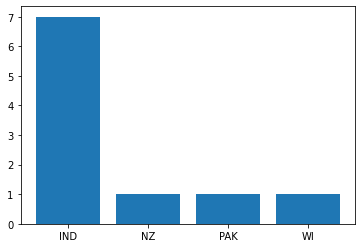

In [3]:
nation = data.groupby('Team').count()['Runs']
print(nation)
plt.bar(['IND','NZ','PAK','WI'],nation)

* 7 out of these 10 double hundreds have been hit by Indian batsmen followed by 1 each by New Zealand, Pakistan and West Indies batsman.

# **Year-wise analysis** 

In [4]:
year = data.groupby('Year').count()['Runs']
print(year)

Year
2010    1
2011    1
2013    1
2014    1
2015    2
2017    1
2018    1
2022    1
2023    1
Name: Runs, dtype: int64


* Double Hundreds have been hit every year since 2010 except 2012,2016,2019,2020,2021.
* Most number of double hundreds were hit in 2015 (2). They were both made in World Cup 2015.

# **Highest Scores**

In [5]:
hi_sco = data.sort_values( by = ['Runs'] , ascending = False)
hi_sco

,Name,Team,Year,Innings,Position,Runs,Balls,Strike Rate,Against,Series,City,Host Nation,Team Score,MOTM,Win,Not Out,Captain
3,Rohit Sharma,India,2014,1,Open,264,173,152.601156,Sri Lanka,Bilateral,Kolkata,India,404/5,Yes,Yes,No,No
5,Martin Guptill,New Zealand,2015,1,Open,237,163,145.398773,West Indies,World Cup,Wellington,New Zealand,393/6,Yes,Yes,Yes,No
1,Virendra Sehwag,India,2011,1,Open,219,149,146.979866,West Indies,Bilateral,Indore,India,418/5,Yes,Yes,No,No
4,Chris Gayle,West Indies,2015,1,Open,215,147,146.258503,Zimbabwe,World Cup,Canberra,Australia,372/2,Yes,Yes,No,No
7,Fakhar Zaman,Pakistan,2018,1,Open,210,156,134.615385,Zimbabwe,Bilateral,Bulawayo,Zimbabwe,399/1,Yes,Yes,Yes,No
8,Ishan Kishan,India,2022,1,Open,210,131,160.305343,Bangladesh,Bilateral,Chattogram,India,409/8,Yes,Yes,No,No
2,Rohit Sharma,India,2013,1,Open,209,158,132.278481,Australia,Bilateral,Bengaluru,India,383/6,Yes,Yes,No,No
6,Rohit Sharma,India,2017,1,Open,208,153,135.947712,Sri Lanka,Bilateral,Mohali,India,392/4,Yes,Yes,No,No
9,Shubman Gill,India,2023,1,Open,208,149,139.597315,New Zealand,Bilateral,Hyderabad,India,349/8,Yes,Yes,No,No
0,Sachin Tendulkar,India,2010,1,Open,200,147,136.054422,South Africa,Bilateral,Gwalior,India,401/3,Yes,Yes,Yes,No


* Highest Score is 264 by Rohit Sharma against Sri Lanka in 2014 at Eden Gardens,Kolkata. 
* Lowest Score among all these is 200 not out by Sachin Tendulkar against South Africa in 2010 at Gwalior, India.

In [6]:
split_score = data['Team Score'].str.split("/")
team_runs = np.arange(len(data))
team_wic = np.arange(len(data))
for i in range(len(data)) : 
    team_runs[i] = split_score[i][0]
    team_wic[i] = split_score[i][1]
print(team_runs,team_wic)

[401 418 383 404 372 393 392 399 409 349] [3 5 6 5 2 6 4 1 8 8]


In [7]:
odi200 = data.drop(columns=['Team Score'])
odi200['Team Runs'] = team_runs
odi200['Team Wickets'] = team_wic
odi200

,Name,Team,Year,Innings,Position,Runs,Balls,Strike Rate,Against,Series,City,Host Nation,MOTM,Win,Not Out,Captain,Team Runs,Team Wickets
0,Sachin Tendulkar,India,2010,1,Open,200,147,136.054422,South Africa,Bilateral,Gwalior,India,Yes,Yes,Yes,No,401,3
1,Virendra Sehwag,India,2011,1,Open,219,149,146.979866,West Indies,Bilateral,Indore,India,Yes,Yes,No,No,418,5
2,Rohit Sharma,India,2013,1,Open,209,158,132.278481,Australia,Bilateral,Bengaluru,India,Yes,Yes,No,No,383,6
3,Rohit Sharma,India,2014,1,Open,264,173,152.601156,Sri Lanka,Bilateral,Kolkata,India,Yes,Yes,No,No,404,5
4,Chris Gayle,West Indies,2015,1,Open,215,147,146.258503,Zimbabwe,World Cup,Canberra,Australia,Yes,Yes,No,No,372,2
5,Martin Guptill,New Zealand,2015,1,Open,237,163,145.398773,West Indies,World Cup,Wellington,New Zealand,Yes,Yes,Yes,No,393,6
6,Rohit Sharma,India,2017,1,Open,208,153,135.947712,Sri Lanka,Bilateral,Mohali,India,Yes,Yes,No,No,392,4
7,Fakhar Zaman,Pakistan,2018,1,Open,210,156,134.615385,Zimbabwe,Bilateral,Bulawayo,Zimbabwe,Yes,Yes,Yes,No,399,1
8,Ishan Kishan,India,2022,1,Open,210,131,160.305343,Bangladesh,Bilateral,Chattogram,India,Yes,Yes,No,No,409,8
9,Shubman Gill,India,2023,1,Open,208,149,139.597315,New Zealand,Bilateral,Hyderabad,India,Yes,Yes,No,No,349,8


# **Common trends**
* All 200s were hit in first innings.
* All these were hit by openers
* All of these resulted in a win for the team
* All these batsmen received Man Of The Match award for these performances.
* No captain has ever hit a 200 in ODIs.

# **Opponent teams**

Against
Australia       1
Bangladesh      1
New Zealand     1
South Africa    1
Sri Lanka       2
West Indies     2
Zimbabwe        2
Name: Runs, dtype: int64


<BarContainer object of 7 artists>

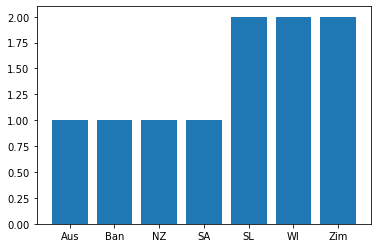

In [8]:
oppo = data.groupby('Against').count()['Runs']
print(oppo)
plt.bar(['Aus','Ban','NZ','SA','SL','WI','Zim'],oppo)

* 6 out of these 10 200s came against Sri Lanka, West Indies and Zimbabwe (2 each).
* India,Pakistan, Afghanistan and England are the only teams which have never conceded an individual ODI double Hundred among top 10 ICC ranked ODI teams (as per 2023 : India ,Pakistan, England, Afghanistan,Australia,New Zealand,South Africa, Bangladesh,Sri Lanka and West Indies)

# **Average Strike Rate**

In [9]:
print('Average Strike Rate : ',np.mean(data['Strike Rate']))
print('This is a high strike rate as per ODI standards.')

Average Strike Rate :  143.00369569999998
This is a high strike rate as per ODI standards.


In [10]:
print('Average balls faced : ',np.mean(data['Balls']))
print('On an average, the batsmen have faced 153 balls')

Average balls faced :  152.6
On an average, the batsmen have faced 153 balls


Maintaining a strike as high as 143 after facing 153 balls is a really difficult task

# **Contribution to team total**

In [11]:
contr = (data['Runs']/odi200['Team Runs'])*100
print(contr)

0    49.875312
1    52.392344
2    54.569191
3    65.346535
4    57.795699
5    60.305344
6    53.061224
7    52.631579
8    51.344743
9    59.598854
dtype: float64


In [12]:
print('Average contribution of an ODI 200 to team total : ' ,np.mean(contr))

Average contribution of an ODI 200 to team total :  55.69208244901178


In [13]:
print('Highest Contribution of an ODI 200 to team total : 65.34 % ')
print(data.iloc[3])

Highest Contribution of an ODI 200 to team total : 65.34 % 
Name           Rohit Sharma
Team                  India
Year                   2014
Innings                   1
Position               Open
Runs                    264
Balls                   173
Strike Rate      152.601156
Against           Sri Lanka
Series            Bilateral
City                Kolkata
Host Nation           India
Team Score            404/5
MOTM                    Yes
Win                     Yes
Not Out                  No
Captain                  No
Name: 3, dtype: object


In [14]:
print('Lowest Contribution : 49.87% ')
print(data.iloc[0])

Lowest Contribution : 49.87% 
Name           Sachin Tendulkar
Team                      India
Year                       2010
Innings                       1
Position                   Open
Runs                        200
Balls                       147
Strike Rate          136.054422
Against            South Africa
Series                Bilateral
City                    Gwalior
Host Nation               India
Team Score                401/3
MOTM                        Yes
Win                         Yes
Not Out                     Yes
Captain                      No
Name: 0, dtype: object


Double Hundreds have always contributed atleast half of the total runs scored by the team

# **Double Hundreds away from home**

In [15]:
data[data['Team']!=data['Host Nation']]

,Name,Team,Year,Innings,Position,Runs,Balls,Strike Rate,Against,Series,City,Host Nation,Team Score,MOTM,Win,Not Out,Captain
4,Chris Gayle,West Indies,2015,1,Open,215,147,146.258503,Zimbabwe,World Cup,Canberra,Australia,372/2,Yes,Yes,No,No
7,Fakhar Zaman,Pakistan,2018,1,Open,210,156,134.615385,Zimbabwe,Bilateral,Bulawayo,Zimbabwe,399/1,Yes,Yes,Yes,No


* Only 2 double hundreds were hit outside home, both against Zimbabwe.
* First one was hit by Chris Gayle in World Cup 2015 at Australia (215).
* Second one was by Fakhar Zaman in a bilateral at Zimbabwe in 2018 (210 not out).

# **Double Hundreds in World Cups**

Series
Bilateral    8
World Cup    2
Name: Runs, dtype: int64


([<matplotlib.patches.Wedge at 0x7f9ed6cfd990>,
 [Text(-0.8899187180267095, 0.6465637441936395, 'Bilateral'),
  Text(0.8899187482945414, -0.6465637025335375, 'World Cup')],
 [Text(-0.48541020983275057, 0.3526711331965306, '80.0%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.0%')])

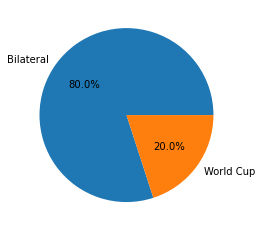

In [24]:
ser = data.groupby('Series').count()['Runs']
print(ser)
plt.pie(ser,labels=ser.index,autopct='%0.1f%%')

In [25]:
data[data['Series']=='World Cup']

,Name,Team,Year,Innings,Position,Runs,Balls,Strike Rate,Against,Series,City,Host Nation,Team Score,MOTM,Win,Not Out,Captain
4,Chris Gayle,West Indies,2015,1,Open,215,147,146.258503,Zimbabwe,World Cup,Canberra,Australia,372/2,Yes,Yes,No,No
5,Martin Guptill,New Zealand,2015,1,Open,237,163,145.398773,West Indies,World Cup,Wellington,New Zealand,393/6,Yes,Yes,Yes,No


* Only 2 200s have been hit in world cup. One by Martin Guptill of New Zealand against West Indies in New Zealand and another by Chris Gayle of West Indies against Zimbabwe in Australia, both in 2015 World Cup at almost the same strike rate.